<a href="https://colab.research.google.com/github/bijili-parasa/DL_PROJECTS/blob/main/churn_analysis_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
dataset = 'https://www.kaggle.com/datasets/blastchar/telco-customer-churn'

In [ ]:
od.download(dataset)


Skipping, found downloaded files in "./telco-customer-churn" (use force=True to force download)


In [ ]:
data_dir = './telco-customer-churn'

In [ ]:
import os

In [ ]:
os.listdir(data_dir)

['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


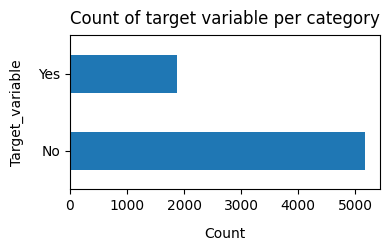

In [ ]:
df['Churn'].value_counts().plot(kind='barh', figsize=(4,2))
plt.xlabel("Count", labelpad= 10)
plt.ylabel("Target_variable", labelpad= 10)
plt.title("Count of target variable per category", y = 1.02);

In [ ]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


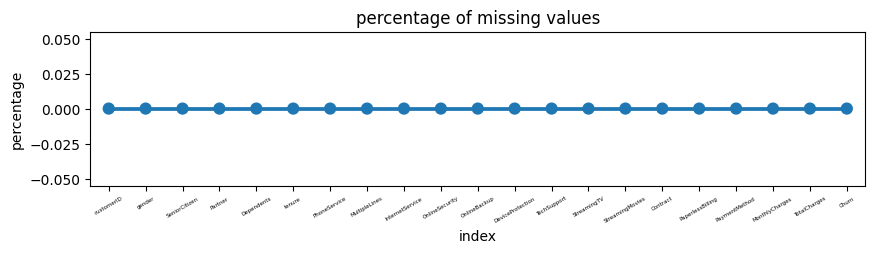

In [ ]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(10,2))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation = 30, fontsize = 4)
plt.title("percentage of missing values")
plt.ylabel("percentage")
plt.show()


In [ ]:
telco_data =df.copy()

In [ ]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
telco_data.TotalCharges= pd.to_numeric(telco_data.TotalCharges, errors= 'coerce')

In [ ]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
telco_data.dropna(how='any',inplace =True)

In [ ]:
print(telco_data['tenure'].max())

72


In [ ]:
labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]
telco_data['Tenure_group'] = pd.cut(telco_data.tenure, range(1,80,12),right = False, labels=labels)


In [ ]:
telco_data['Tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: Tenure_group, dtype: int64

In [ ]:
telco_data.drop(columns = ['customerID','tenure'],axis = 1,inplace =True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


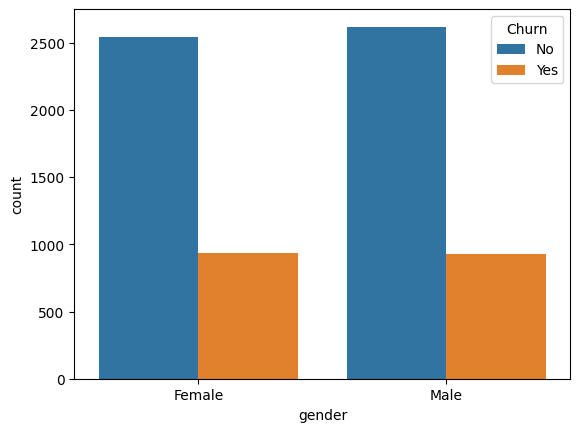

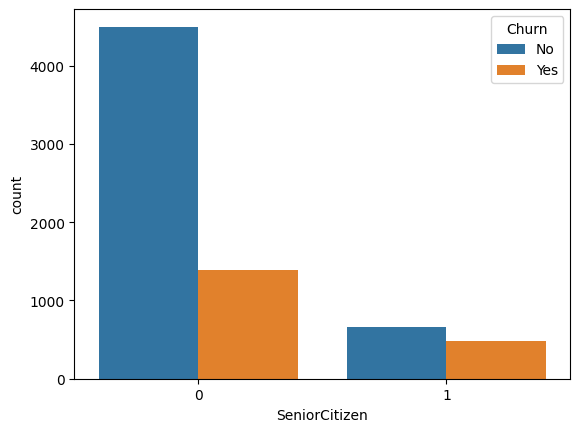

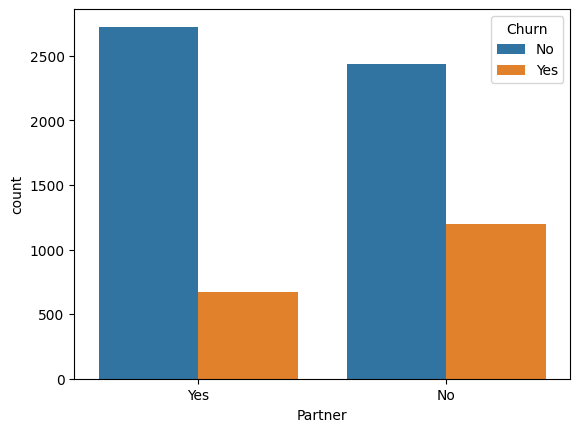

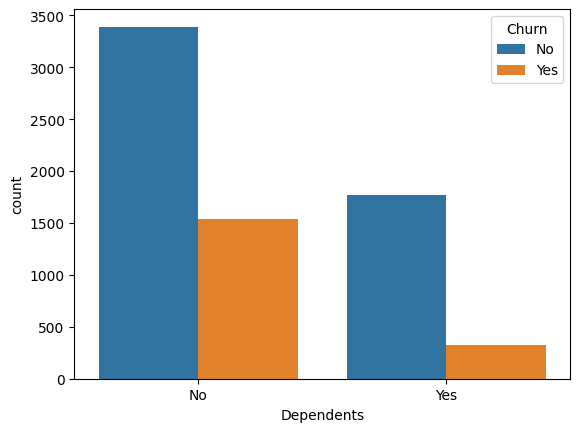

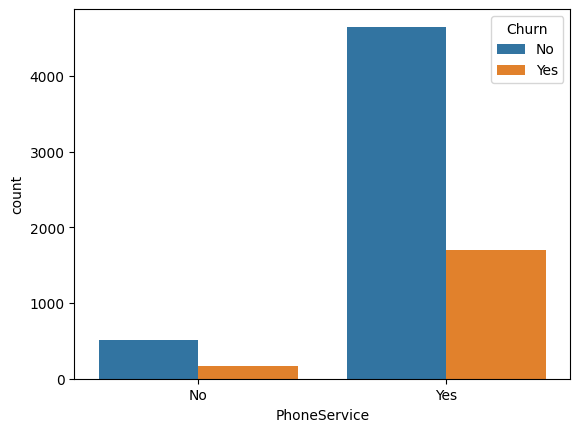

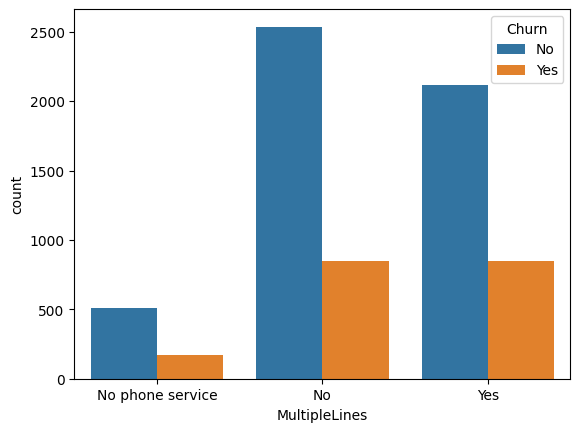

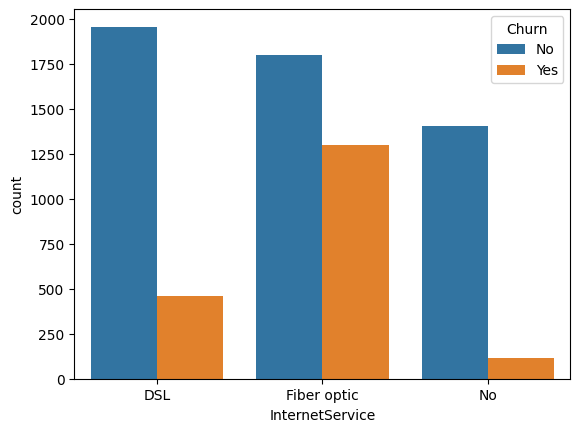

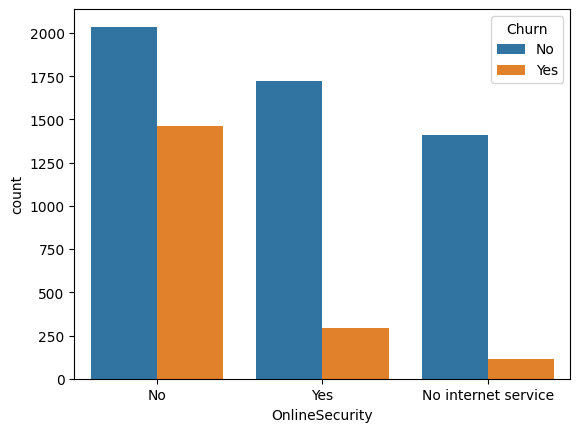

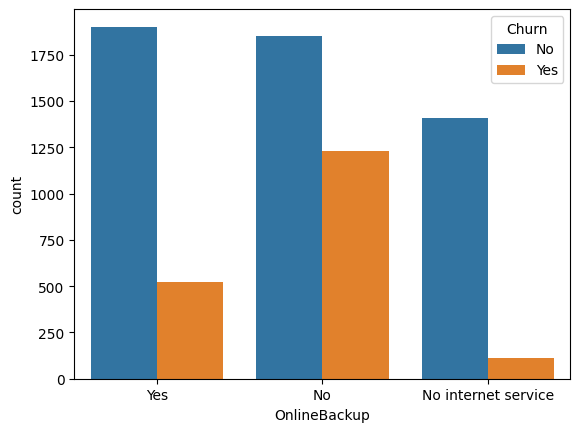

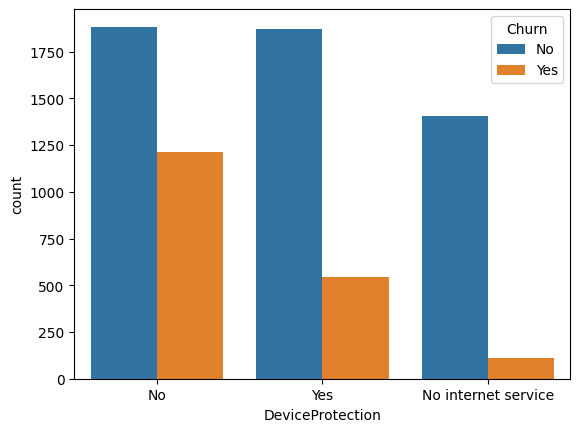

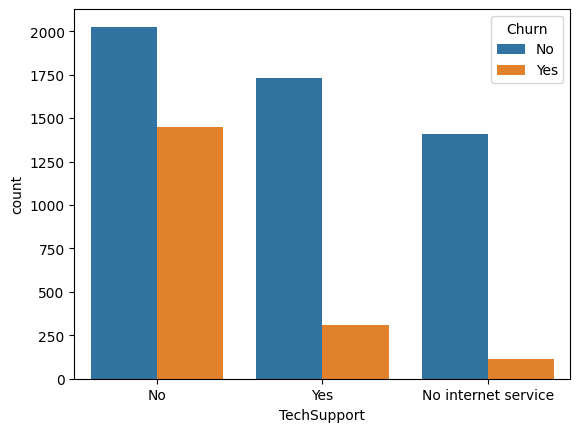

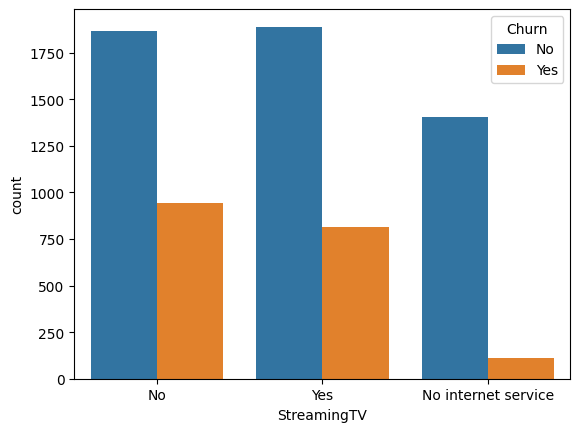

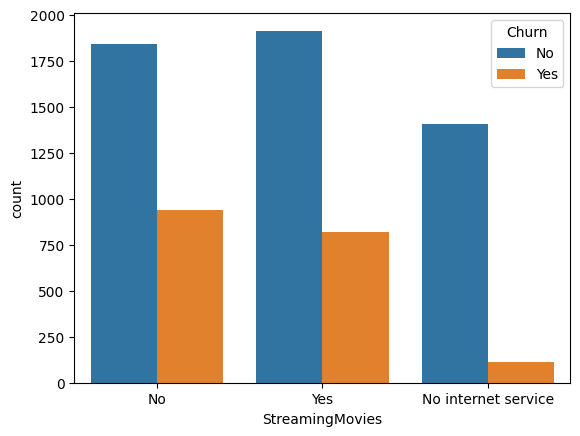

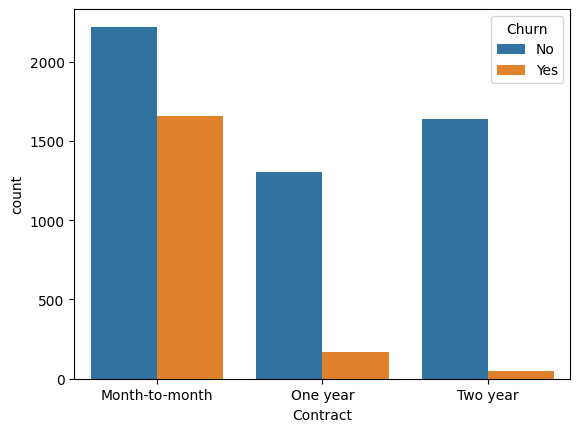

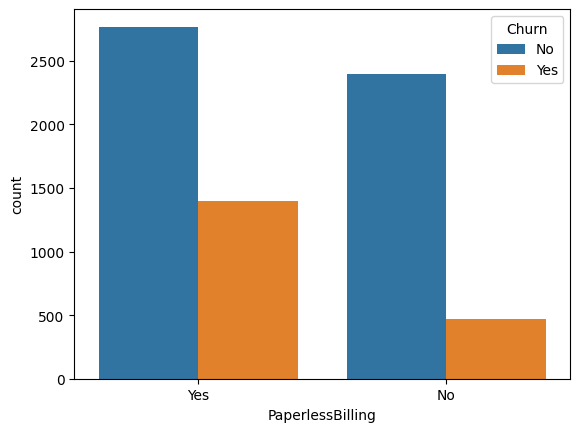

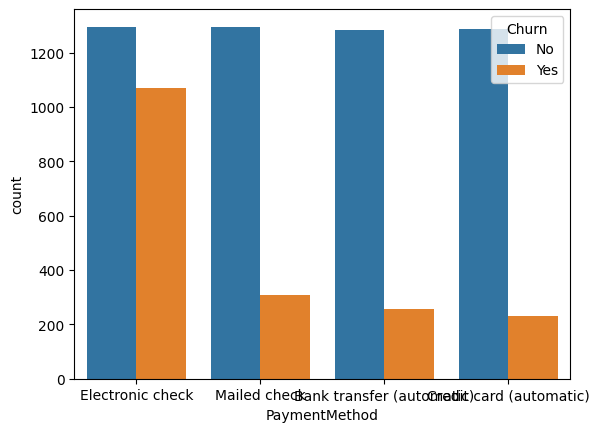

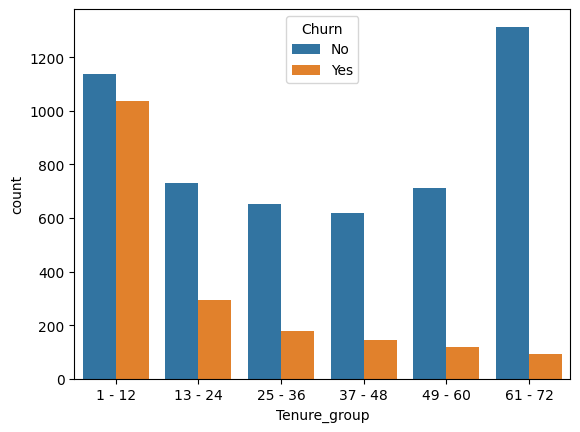

In [ ]:
for i,predictor in enumerate (telco_data.drop(columns = ['Churn','MonthlyCharges','TotalCharges'])):
  plt.figure(i)
  sns.countplot(data = telco_data, x=predictor, hue ='Churn')


In [ ]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [ ]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [ ]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_group_1 - 12,Tenure_group_13 - 24,Tenure_group_25 - 36,Tenure_group_37 - 48,Tenure_group_49 - 60,Tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
telco_data_dummies.dtypes

SeniorCitizen                                int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet serv

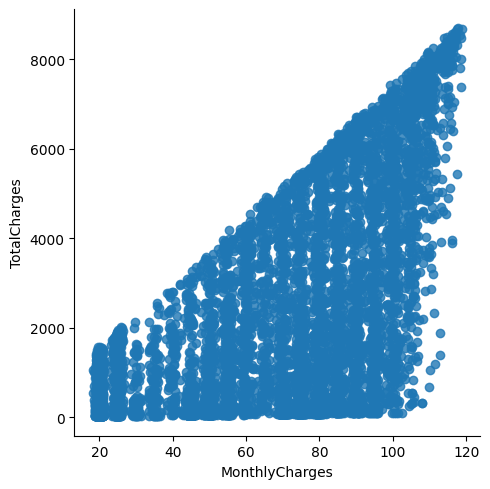

In [ ]:
sns.lmplot(data=telco_data_dummies,x= 'MonthlyCharges',y='TotalCharges', fit_reg=False)

<ipython-input-135-ee1e3bdbc2c1>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn']==0)], color='Red', shade=True)
<ipython-input-135-ee1e3bdbc2c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth  = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn'])==1], ax=Mth ,color = "Blue", shade =True)


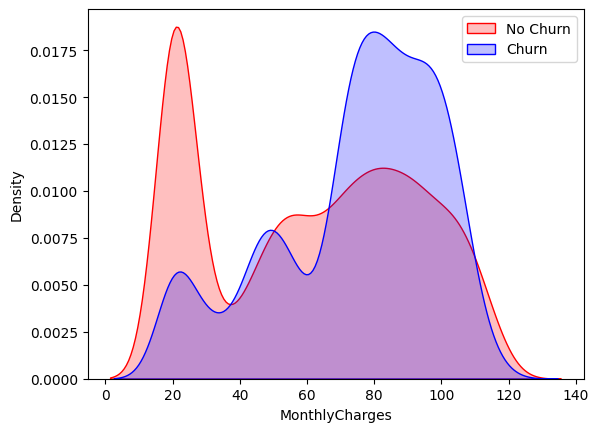

In [ ]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn']==0)], color='Red', shade=True)
Mth  = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn'])==1], ax=Mth ,color = "Blue", shade =True)
Mth.legend(['No Churn','Churn'],loc='upper right')
Mth.set_ylabel=  ("density")
Mth.set_xlabel = ("MonthlyCharges")
Mth.set_title = ("Monthly Charges by churn")



<ipython-input-136-22afb91f97e4>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies['Churn']==0)], color ="Red", shade=True)
<ipython-input-136-22afb91f97e4>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies['Churn']==1)], ax =Tot, color = "Blue", shade =True)


Text(0.5, 1.0, 'Total Charges by churn')

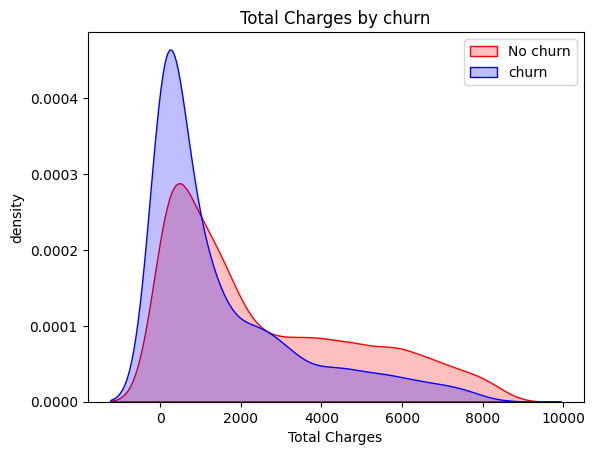

In [ ]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies['Churn']==0)], color ="Red", shade=True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies['Churn']==1)], ax =Tot, color = "Blue", shade =True)
Tot.legend(["No churn", "churn"],loc = "upper right")
Tot.set_ylabel("density")
Tot.set_xlabel("Total Charges")
Tot.set_title("Total Charges by churn")

<Axes: >

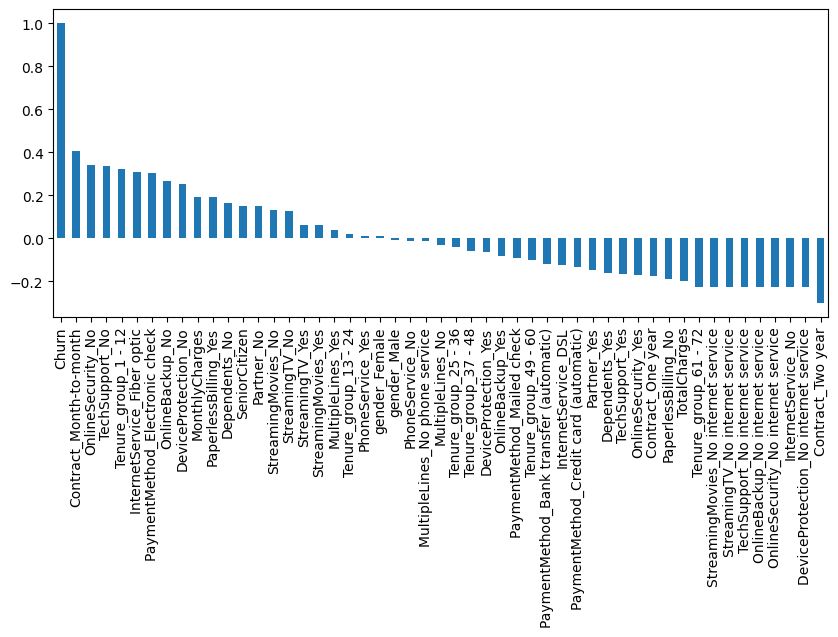

In [ ]:
plt.figure(figsize=(10,4))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

<Axes: >

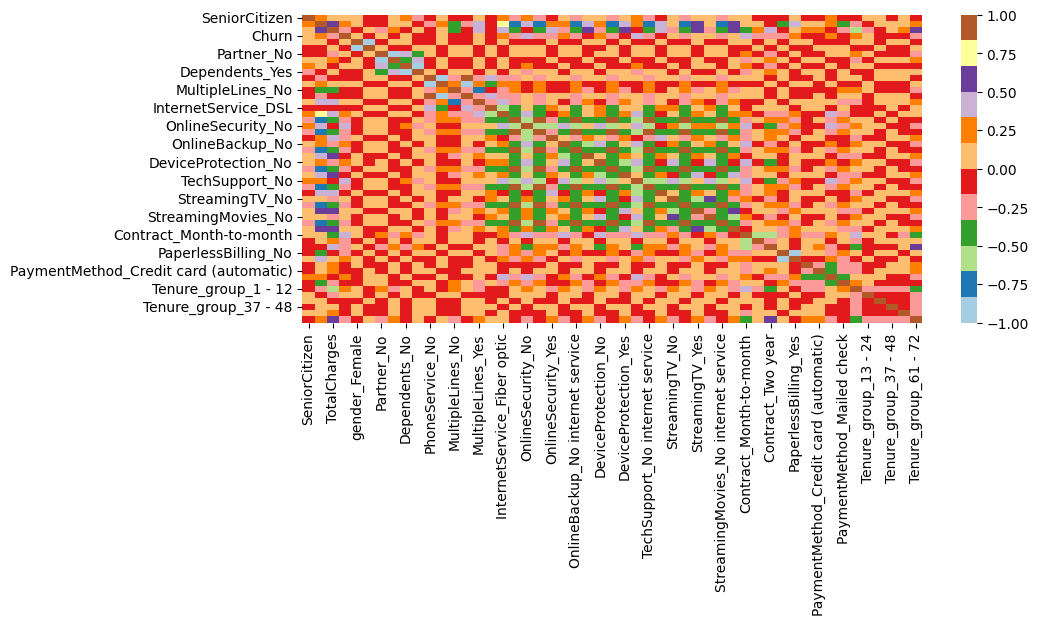

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(telco_data_dummies.corr(), cmap ="Paired")

In [ ]:
new_df1_target0 = telco_data.loc[telco_data['Churn']==0]
new_df1_target1= telco_data.loc[telco_data['Churn']==1]

In [ ]:
def uniplot(df,col,title, hue =None):
  sns.set_style('whitegrid')
  sns.set_context('talk')
  plt.rcParams['axes.labelsize']=20
  plt.rcParams['axes.titlesize']=10
  plt.rcParams['axes.titlepad'] = 10

  temp = pd.Series(data=hue)
  fig, ax = plt.subplots()
  width = len(df[col].unique())+7+4* len(temp.unique())
  fig.set_size_inches(width, 4)
  plt.xticks(rotation=45)
  plt.yscale('log')
  plt.title(title)
  ax = sns.countplot(data = df, x= col, order = df[col].value_counts().index, hue=hue, palette='bright')
  plt.show()



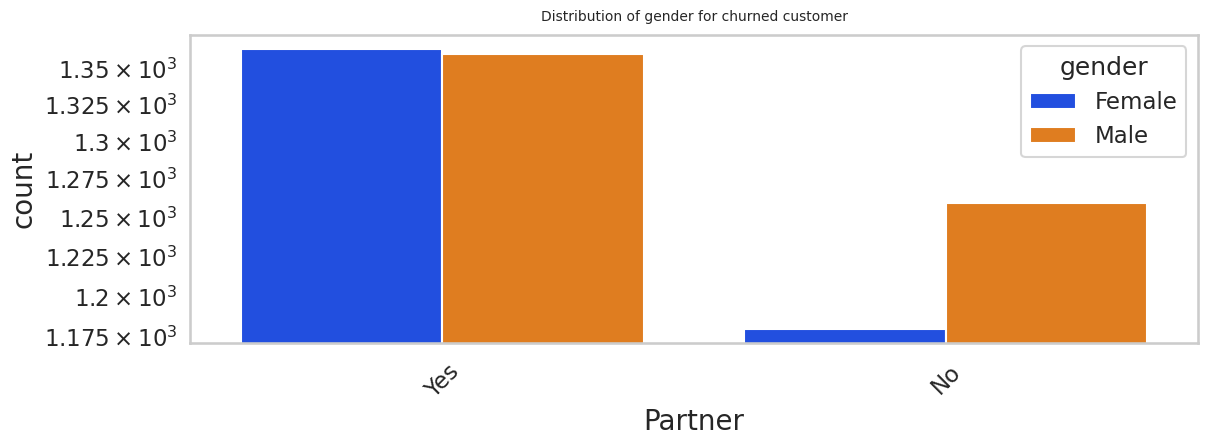

In [ ]:
uniplot(new_df1_target0, col= 'Partner', title = 'Distribution of gender for churned customer', hue ='gender')

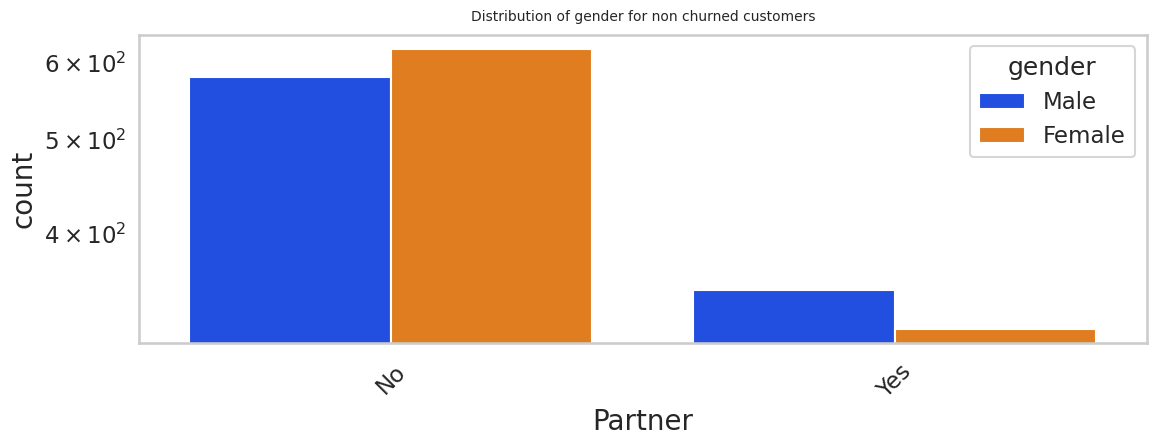

In [ ]:
uniplot(new_df1_target1, col = 'Partner', title= 'Distribution of gender for non churned customers', hue='gender')

In [ ]:
telco_data_dummies.to_csv('tel_churn.csv')

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN


In [ ]:
df = pd.read_csv('/content/tel_churn.csv')

In [ ]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_group_1 - 12,Tenure_group_13 - 24,Tenure_group_25 - 36,Tenure_group_37 - 48,Tenure_group_49 - 60,Tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
df=df.drop('Unnamed: 0',axis=1)


In [ ]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_group_1 - 12,Tenure_group_13 - 24,Tenure_group_25 - 36,Tenure_group_37 - 48,Tenure_group_49 - 60,Tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_group_1 - 12,Tenure_group_13 - 24,Tenure_group_25 - 36,Tenure_group_37 - 48,Tenure_group_49 - 60,Tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model_dt=DecisionTreeClassifier(criterion ='gini', random_state = 100,max_depth = 6,min_samples_leaf=8)

In [ ]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
model_dt.score(x_test, y_test)

0.7974413646055437

In [ ]:
print(classification_report(y_test, y_pred, labels= [0,1]))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1066
           1       0.59      0.54      0.56       341

    accuracy                           0.80      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [ ]:
xr_train,xr_test,yr_train,yr_test= train_test_split(X_resampled, y_resampled,test_size= 0.2)


In [ ]:
model_dt_smote =DecisionTreeClassifier(criterion = 'gini', random_state= 100,max_depth =6, min_samples_leaf=8)

In [ ]:
model_dt_smote.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
yr_predict = model_dt_smote.predict(xr_test)

In [ ]:
model_score_r = model_dt_smote.score(xr_test,yr_test)

In [ ]:
print(model_score_r)

0.9383561643835616


In [ ]:
print(metrics.classification_report(yr_test, yr_predict))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       527
           1       0.95      0.93      0.94       641

    accuracy                           0.94      1168
   macro avg       0.94      0.94      0.94      1168
weighted avg       0.94      0.94      0.94      1168



In [ ]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[497  30]
 [ 42 599]]


Random_forest method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, criterion = 'gini', random_state=100, max_depth = 6, min_samples_leaf=8)

In [ ]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred = model_rf.predict(x_test)

In [ ]:
model_rf.score(x_test,y_test)

0.8081023454157783

In [ ]:
print(classification_report(y_test,y_pred, labels =[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1066
           1       0.64      0.47      0.54       341

    accuracy                           0.81      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.79      0.81      0.80      1407



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[977  89]
 [181 160]]


In [ ]:
sm =SMOTEENN()
X_resampled1, y_resampled1= sm.fit_resample(x,y)

In [ ]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1,y_resampled1,test_size=0.2)

In [ ]:
model_rf_smote = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_depth =6, min_samples_leaf=8)

In [ ]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8)

In [ ]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [ ]:
yr_predict1

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
model_rf_score1= model_rf_smote.score(xr_test1, yr_test1)

In [ ]:
model_rf_score1

0.9304123711340206

In [ ]:
print(classification_report(yr_test1,yr_predict1))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       519
           1       0.92      0.96      0.94       645

    accuracy                           0.93      1164
   macro avg       0.93      0.93      0.93      1164
weighted avg       0.93      0.93      0.93      1164



In [ ]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[465  54]
 [ 27 618]]


performing PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca= pca.fit_transform(xr_train1)
xr_test_pca= pca.transform(xr_test1)
explained_variance=pca.explained_variance_ratio_

In [ ]:
model  =RandomForestClassifier(n_estimators=100, criterion ='gini', random_state=100,max_depth = 6, min_samples_leaf=8)

In [ ]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
yr_predict_pca= model.predict(xr_test_pca)

In [ ]:
model_score_rf_pca=model.score(xr_test_pca,yr_test1)

In [ ]:
print(model_score_rf_pca)

0.7353951890034365


In [ ]:
print(classification_report(yr_test1,yr_predict_pca))

              precision    recall  f1-score   support

           0       0.74      0.62      0.68       519
           1       0.73      0.82      0.78       645

    accuracy                           0.74      1164
   macro avg       0.74      0.72      0.73      1164
weighted avg       0.74      0.74      0.73      1164



pickling process

In [ ]:
import pickle

In [ ]:
filename= 'model.sav'

In [ ]:
pickle.dump(model_rf_smote, open(filename,'wb'))


In [ ]:
load_model = pickle.load(open(filename,'rb'))

In [ ]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [ ]:
model_score_r1

0.9304123711340206

In [ ]:
!git clone https://github.com/pik1989/MLProject-ChurnPrediction.git

Cloning into 'MLProject-ChurnPrediction'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 97 (delta 25), reused 22 (delta 22), pack-reused 71
Receiving objects: 100% (97/97), 3.42 MiB | 10.60 MiB/s, done.
Resolving deltas: 100% (45/45), done.


NameError: ignored